# 問題1 コンペティション内容の把握

Home Creditはどのような企業？<br>
銀行口座のない人の信用付けを行う企業<br>

このコンペティションでは何を予測する？<br>
様々な変数を元に返済能力があるかどうかを予測する<br>

それを予測することで企業が得られるメリットは何？<br>
より多くの消費者に対して融資することが可能となり、より多くの利益を得ることができるようになる<br>


# 問題2 データの概観の把握

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('../application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
df.loc[:,'EXT_SOURCE_3'].isnull().sum()

60965

24825 282686


([<matplotlib.axis.XTick at 0x108f1c2b0>,
 <a list of 2 Text xticklabel objects>)

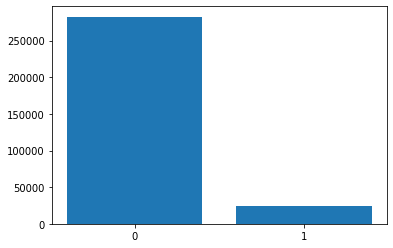

In [9]:


y = df.loc[:,'TARGET']
hist = []

hist.append(y[y==0].count())
hist.append(y[y==1].count())

print(y[y==1].count(),y[y==0].count())
plt.bar(np.unique(y),hist)
plt.xticks([0,1])


# 問題3　課題設定

1.欠損値が多数存在する特徴量がある<br>
2.特徴量の数が多すぎる

# 問題4　データ探索

# 欠損値の確認

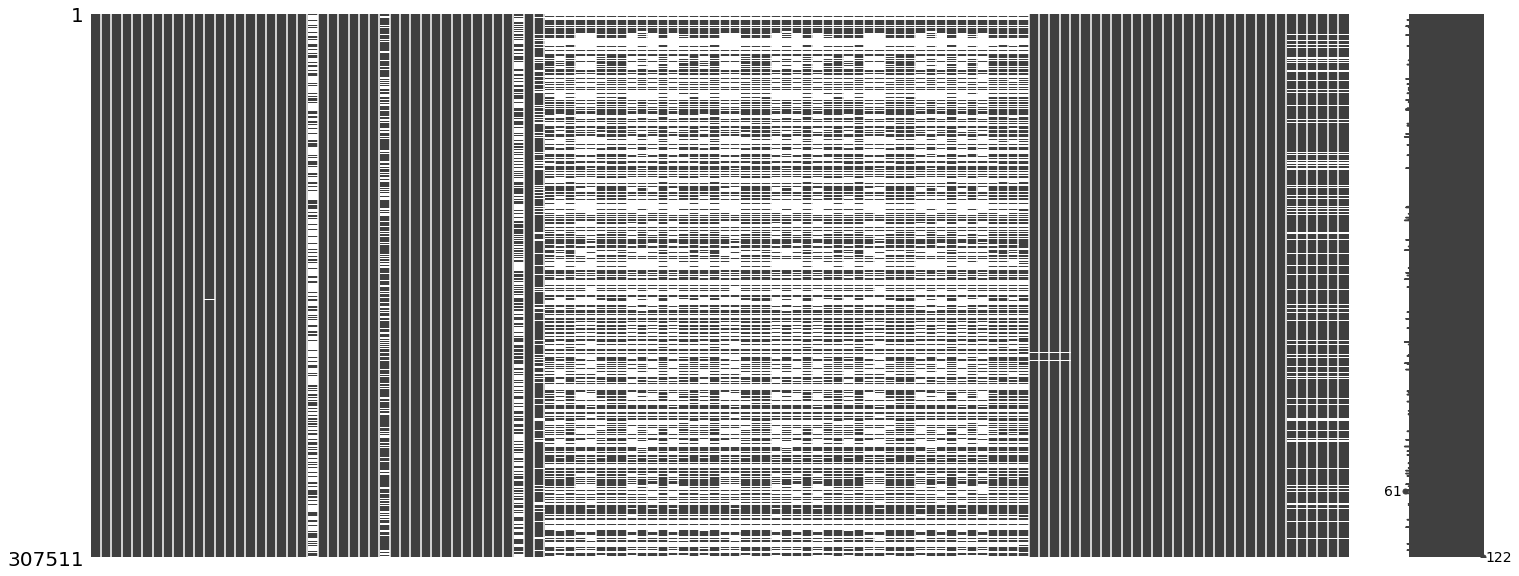

In [10]:
#欠損値の処理
import missingno as msno
msno.matrix(df)

matrixではやや見づらいのでbarで表示して見る

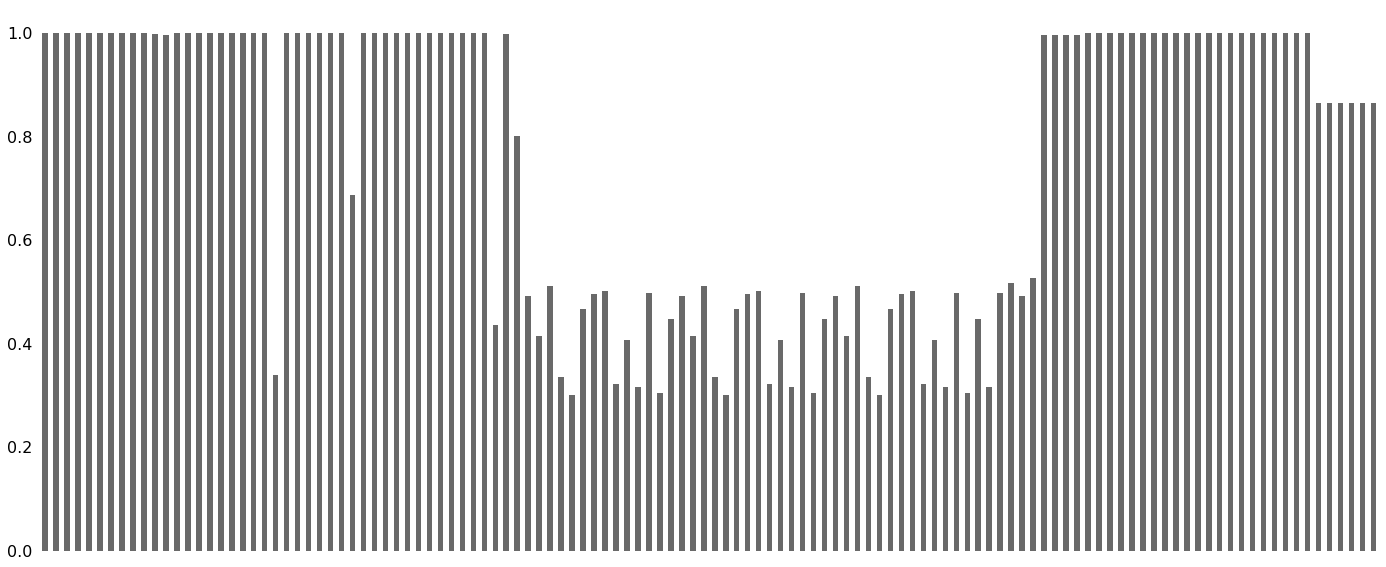

In [44]:
msno.bar(df)

欠損値がデータに多分に含まれていることがわかる

In [149]:
df.isnull().sum().sort_values(ascending=False).head(30)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
FLOORSMIN_MEDI              208642
FLOORSMIN_MODE              208642
FLOORSMIN_AVG               208642
YEARS_BUILD_MEDI            204488
YEARS_BUILD_AVG             204488
YEARS_BUILD_MODE            204488
OWN_CAR_AGE                 202929
LANDAREA_MODE               182590
LANDAREA_AVG                182590
LANDAREA_MEDI               182590
BASEMENTAREA_MEDI           179943
BASEMENTAREA_AVG            179943
BASEMENTAREA_MODE           179943
EXT_SOURCE_1                173378
NONLIVINGAREA_MEDI          169682
NONLIVINGAREA_AVG           169682
NONLIVINGAREA_MODE          169682
ELEVATORS_MODE              163891
ELEVATORS_AVG       

# 教師ラベルであるTARGETとのそれぞれの変数の相関を見る

In [12]:
import seaborn as sns

In [13]:
df_corr = df.corr()
df_corr
corr_columns = df_corr.columns
corr_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [14]:
df_corr['corr'] = corr_columns
target_corr= df_corr.loc[:,['corr','TARGET']]
target_corr.head()

,corr,TARGET
SK_ID_CURR,SK_ID_CURR,-0.002108
TARGET,TARGET,1.000000
CNT_CHILDREN,CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,-0.003982
AMT_CREDIT,AMT_CREDIT,-0.030369


In [15]:
target_corr['TARGET'] = np.abs(target_corr.iloc[:,1])
target_corr.head()

,corr,TARGET
SK_ID_CURR,SK_ID_CURR,0.002108
TARGET,TARGET,1.000000
CNT_CHILDREN,CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,0.003982
AMT_CREDIT,AMT_CREDIT,0.030369


In [16]:
df_c = target_corr.sort_values('TARGET', ascending=False)
df_c = pd.DataFrame(data=df_c)
type(df_c)

pandas.core.frame.DataFrame

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105]), <a list of 106 Text xticklabel objects>)

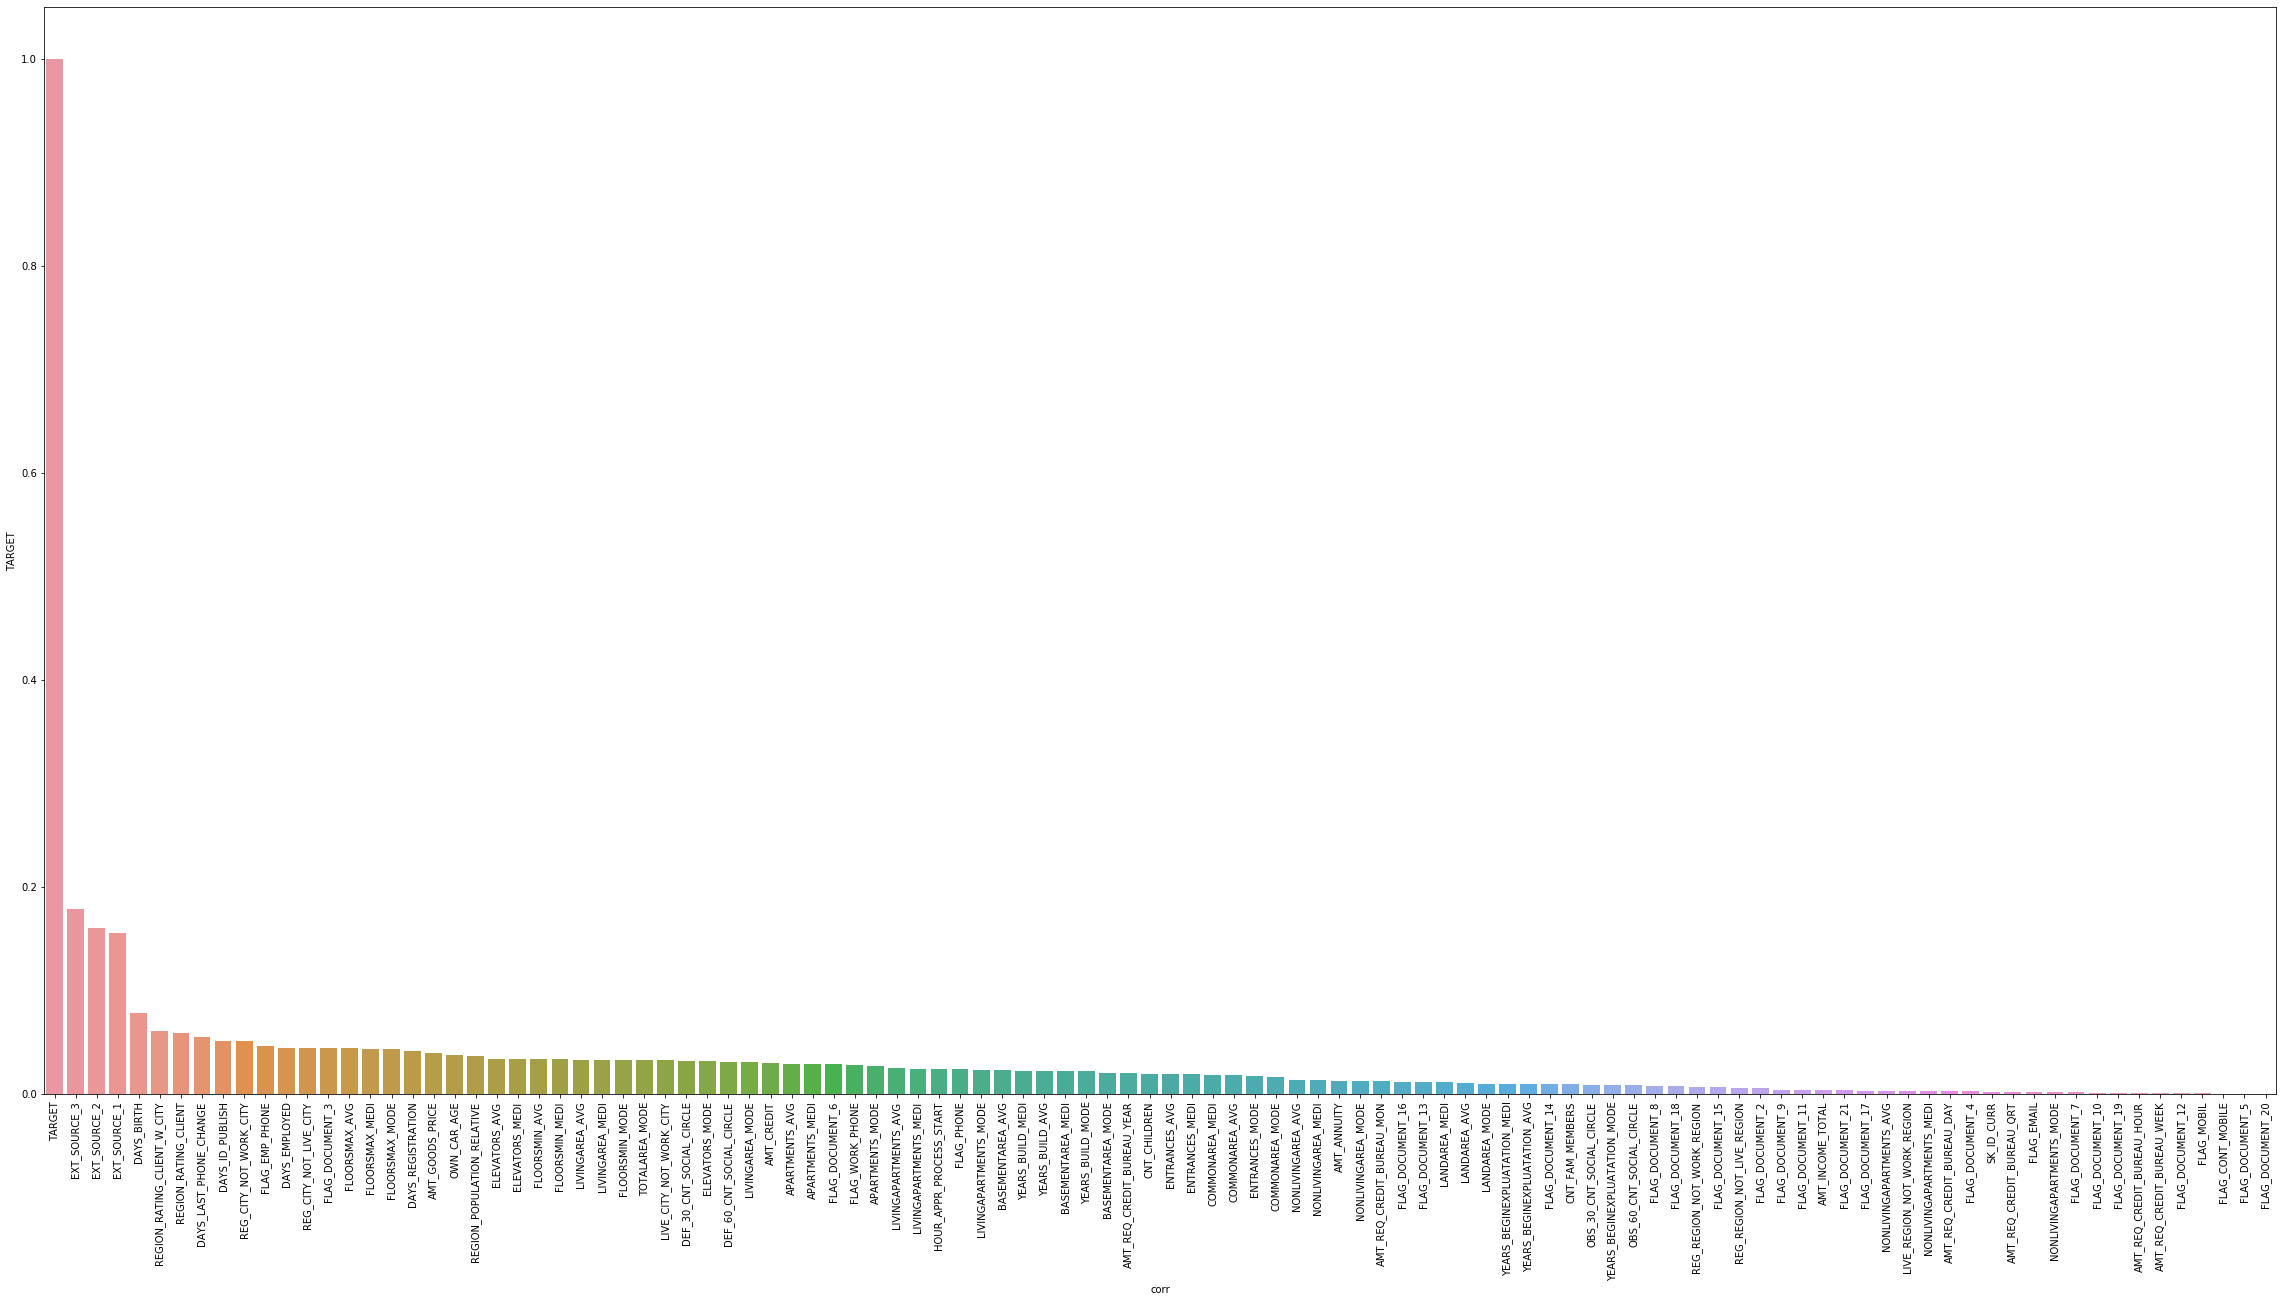

In [17]:
fig = plt.figure(1,figsize=(40,20))
df_c.shape
sns.barplot(data=df_c,x="corr",y="TARGET")
plt.xticks(rotation=90)

上図からexit_sourceが最もtargetと相関性があるということが分かる

# targetと相関の高い三つの変数の相関を確認

In [42]:
top3_columns = ['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']
top3_df = df.loc[:,top3_columns]
top3_df.corr()


,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1
EXT_SOURCE_3,1.000000,0.109167,0.186846
EXT_SOURCE_2,0.109167,1.000000,0.213982
EXT_SOURCE_1,0.186846,0.213982,1.000000


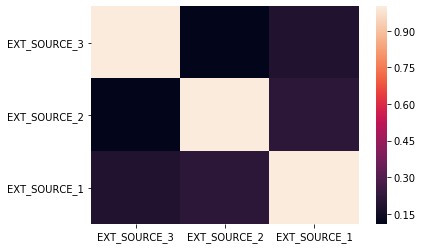

In [43]:
sns.heatmap(top3_df.corr())

In [45]:
top3_df.head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1
0,0.139376,0.262949,0.083037
1,NaN,0.622246,0.311267
2,0.729567,0.555912,NaN
3,NaN,0.650442,NaN
4,NaN,0.322738,NaN


# 欠損値を補完する

In [51]:
df_ohe = pd.get_dummies(df)
df_ohe.shape

(307511, 246)

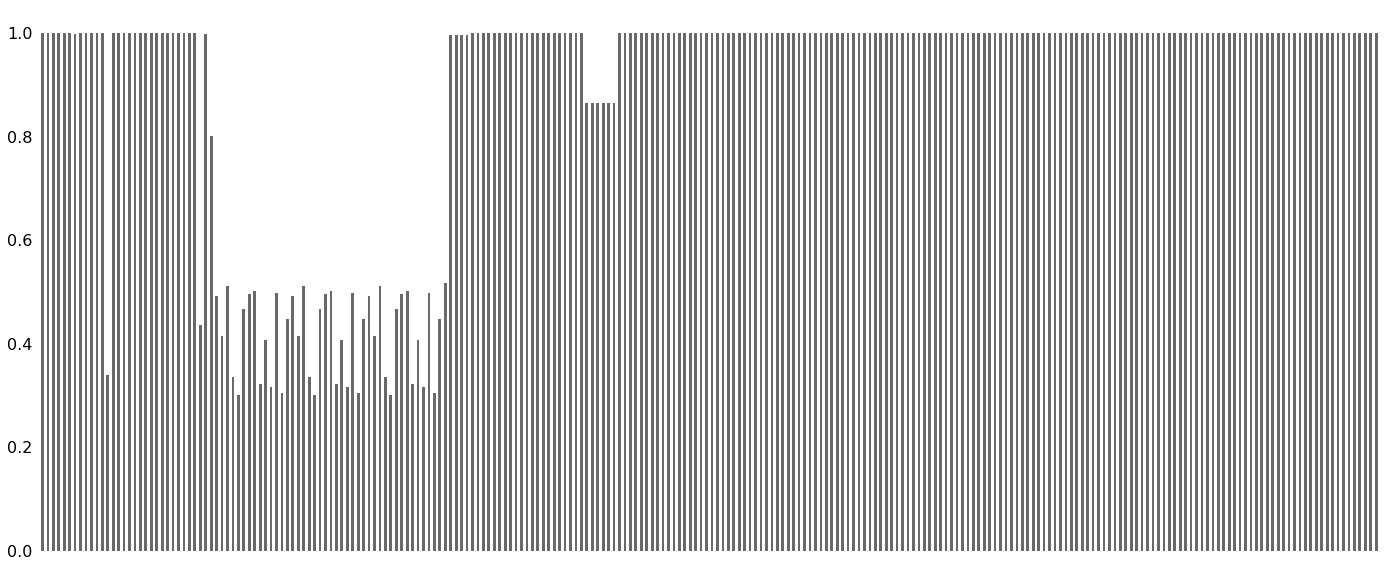

In [52]:
msno.bar(df_ohe)

In [56]:
from sklearn.preprocessing import Imputer
imr = Imputer()
imr = imr.fit(df_ohe.values)
ohe_imputed = imr.transform(df_ohe.values)
ohe_imputed[:5]

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[1.00002e+05, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.00003e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.00004e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00006e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00007e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [57]:
df_ohe_imputed = pd.DataFrame(data=ohe_imputed,
                              columns=df_ohe.columns)
df_ohe_imputed.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


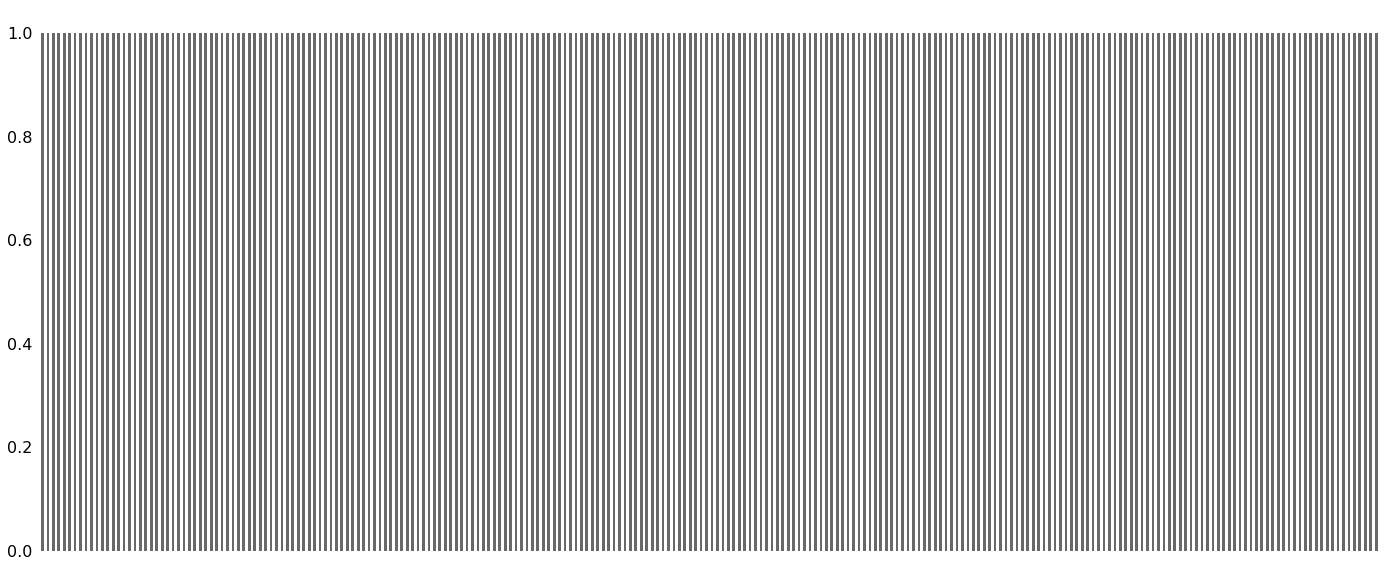

In [152]:
msno.bar(df_ohe_imputed)

欠損値が平均値で補完され、なくなったことがわかる

# 欠損値が補完された結果、targetとの相関がどのように変化したか確認する

In [113]:
def make_corr(df_corr, var_name):
    #print(df_corr.shape)
    #print(df_corr.columns.shape)
    df_corr['corr'] = df_corr.columns
    var_corr= df_corr.loc[:,['corr',var_name]]
    #print(var_corr.head())
    var_corr[var_name] = np.abs(var_corr.iloc[:,1])
    df_var = var_corr.sort_values(var_name, ascending=False)
    df_var = pd.DataFrame(data=df_var)
    del df_corr['corr']
    #print(df_corr.shape)
    return df_var

In [60]:
def make_gragh(df_var,var_name):
    
    fig = plt.figure(1,figsize=(20,10))
    top20_var = df_var.iloc[1:21,:]
    sns.barplot(data=top20_var,x="corr",y=var_name)
    plt.xticks(rotation=90)

In [110]:
df_ohe_corr = df_ohe_imputed.corr()

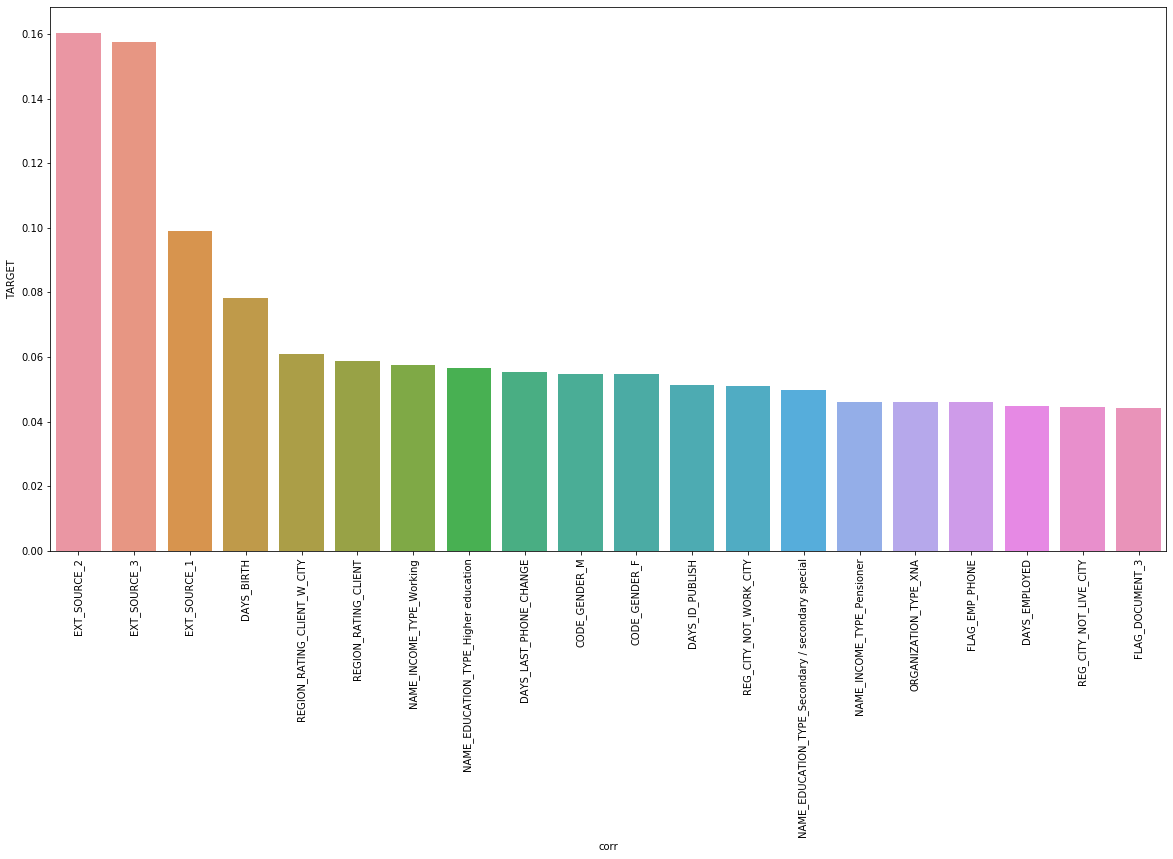

In [114]:
df_var = make_corr(df_ohe_corr,'TARGET')
make_gragh(df_var, 'TARGET')

欠損値を埋めた結果、EXT_SOURCE1,2の相関が下がり、EXT_SOURCE2の相関性が比較的に高くなったのがわかる

# EXT_SOURCEとTARGETの関係を可視化する

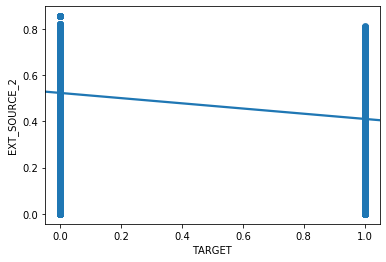

In [124]:
sns.regplot('TARGET','EXT_SOURCE_2',df)

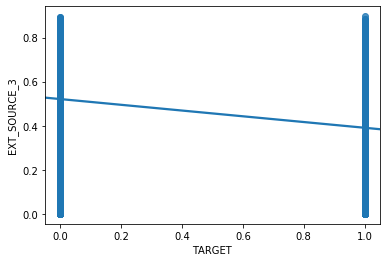

In [125]:
sns.regplot('TARGET','EXT_SOURCE_3',df)

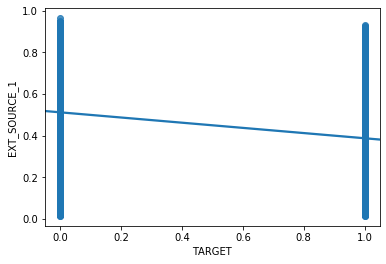

In [126]:
sns.regplot('TARGET','EXT_SOURCE_1',df)

targetと各EXT_SOURCEの関係として、信用がない人ほど、EXT_SOURCEの値が
やや低いということがわかる

# 被説明変数同士の関係を探る

                                                    corr  EXT_SOURCE_2
EXT_SOURCE_2                                EXT_SOURCE_2      1.000000
REGION_RATING_CLIENT                REGION_RATING_CLIENT      0.292610
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT_W_CITY      0.288015
REGION_POPULATION_RELATIVE    REGION_POPULATION_RELATIVE      0.198706
DAYS_LAST_PHONE_CHANGE            DAYS_LAST_PHONE_CHANGE      0.195569


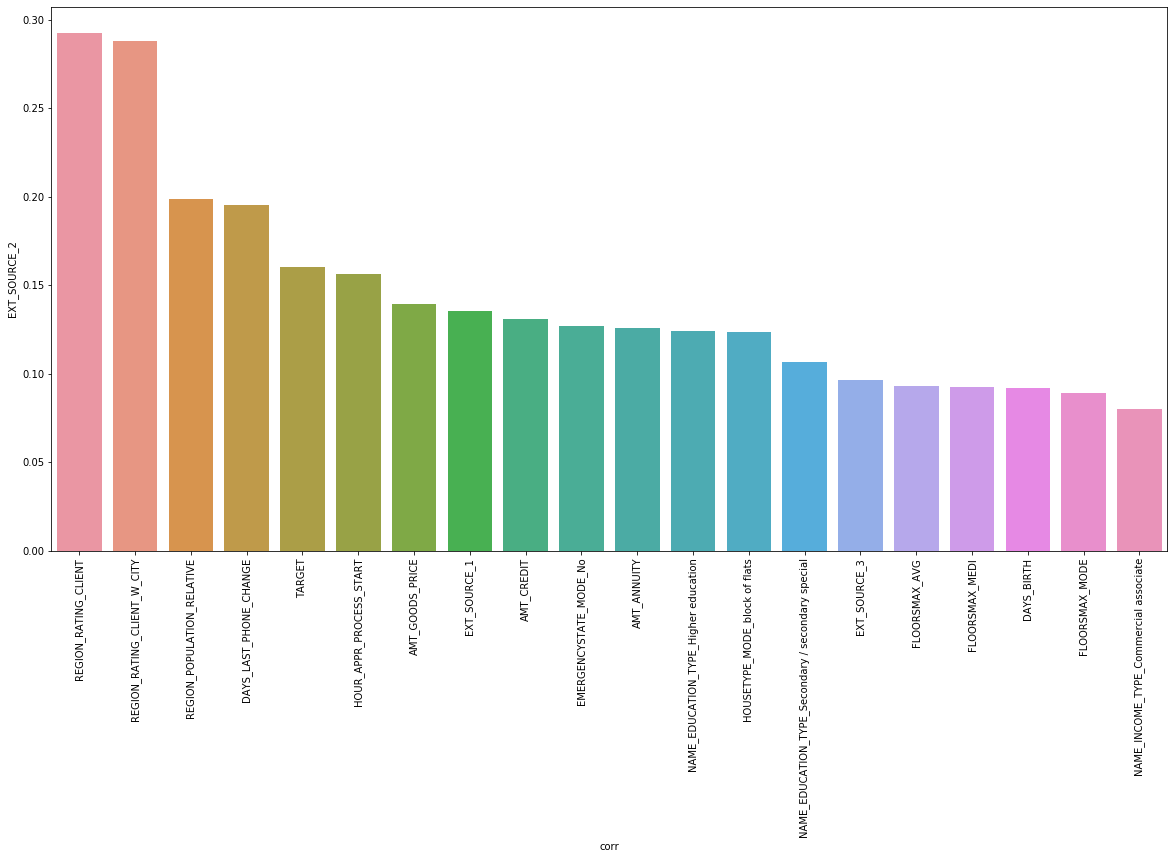

In [115]:
df_var = make_corr(df_ohe_corr,'EXT_SOURCE_2')
print(df_var.head())
make_gragh(df_var, 'EXT_SOURCE_2')

EXT_SOURCE_2と相関が高い変数を調べる。結果から考えると、
EXT_SOURCE_１、EXT_SOURCE_3との相関があまりないように見える。

下図からもほとんど相関がないことが視覚的にわかる

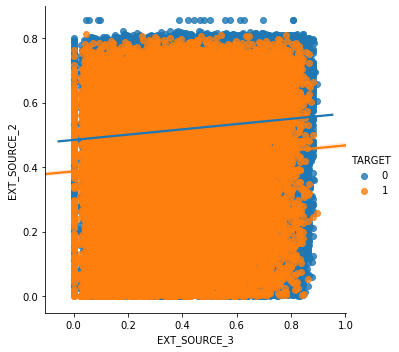

In [130]:
sns.lmplot('EXT_SOURCE_3','EXT_SOURCE_2',hue='TARGET',data=df)

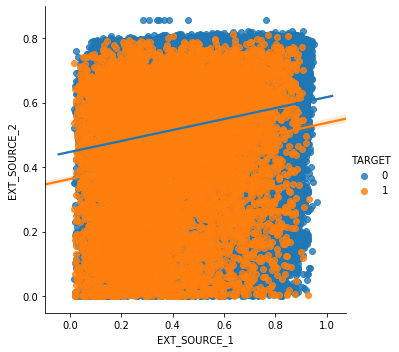

In [131]:
sns.lmplot('EXT_SOURCE_1','EXT_SOURCE_2',hue='TARGET',data=df)

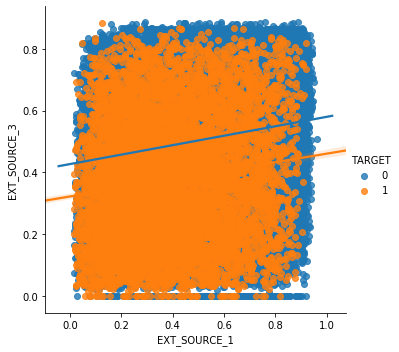

In [132]:
sns.lmplot('EXT_SOURCE_1','EXT_SOURCE_3',hue='TARGET',data=df)

# 被説明変数それぞれの分布を調べる

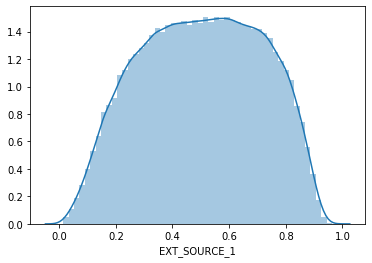

In [165]:
non_nan_1 = df.loc[:,'EXT_SOURCE_1'].notnull()
#print(non_nan)
sns.distplot(df_ohe_imputed.loc[non_nan_1,'EXT_SOURCE_1'])

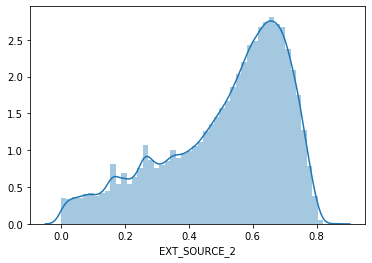

In [166]:
non_nan_2 = df.loc[:,'EXT_SOURCE_2'].notnull()
sns.distplot(df_ohe_imputed.loc[non_nan_2,'EXT_SOURCE_2'])

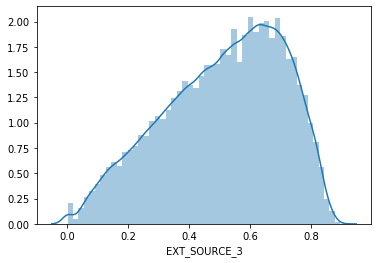

In [167]:
non_nan_3 = df.loc[:,'EXT_SOURCE_3'].notnull()
sns.distplot(df_ohe_imputed.loc[non_nan_3,'EXT_SOURCE_3'])

In [151]:
df.loc[:,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()/\
df.shape[0]

EXT_SOURCE_1    0.563811
EXT_SOURCE_2    0.002146
EXT_SOURCE_3    0.198253
dtype: float64

平均値補完されたデータを除外して、データの分布を調べると、EXT_SOURCE_2,EXT_SOURCE_3はそれぞれ右側に歪んでいることがわかる

# 被説明変数のTARGETごとの分布を調べる

[ True False False ... False False False]


Text(0.5, 1.0, 'not trust group')

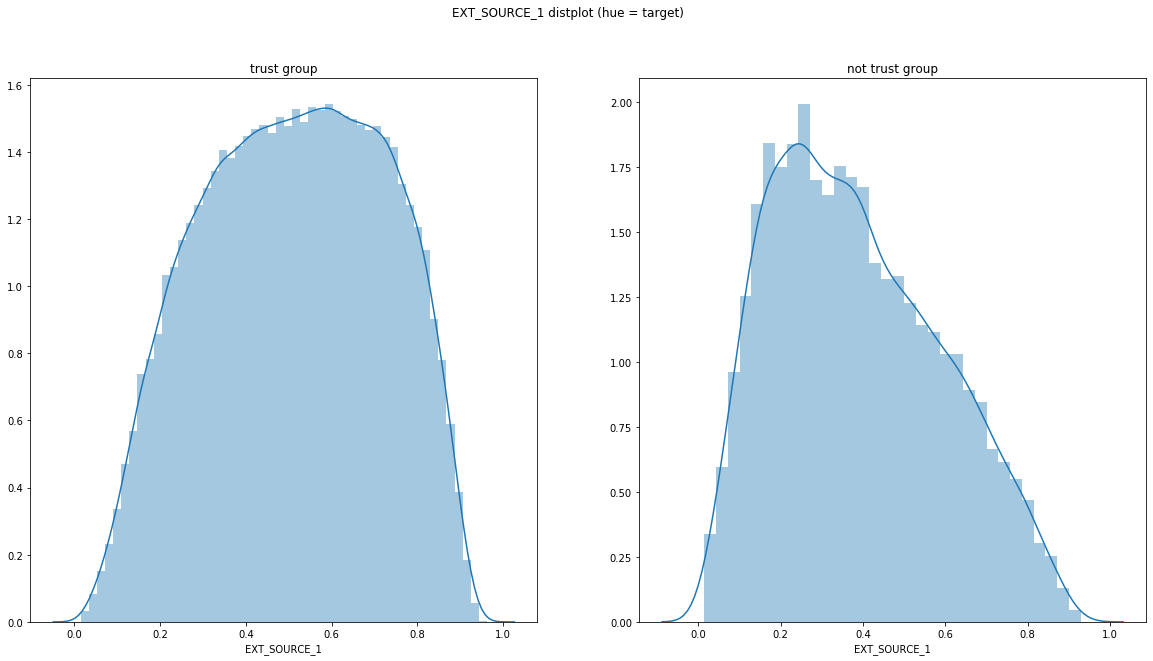

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20,10))
fig.suptitle('EXT_SOURCE_1 distplot (hue = target) ')

plt.subplot(1,2,1)
nonnull_df_1 = df_ohe_imputed.loc[non_nan_1,['EXT_SOURCE_1','TARGET']]
istrust = nonnull_df_1.loc[:,'TARGET'] == 0
#print(istrust)
df_1_trustgroup = nonnull_df_1.loc[istrust,'EXT_SOURCE_1']
df_1_trustgroup
sns.distplot(df_1_trustgroup)
plt.title('trust group')
plt.subplot(1,2,2)
isnottrust = ~np.array(istrust)
print(isnottrust)
df_1_nottrustgroup = nonnull_df_1.loc[isnottrust,'EXT_SOURCE_1']
sns.distplot(df_1_nottrustgroup)
plt.title('not trust group')


In [179]:
a = np.array(True)
e = ~a
print(e)

False


[ True False False ... False  True False]


Text(0.5, 1.0, 'not trust group')

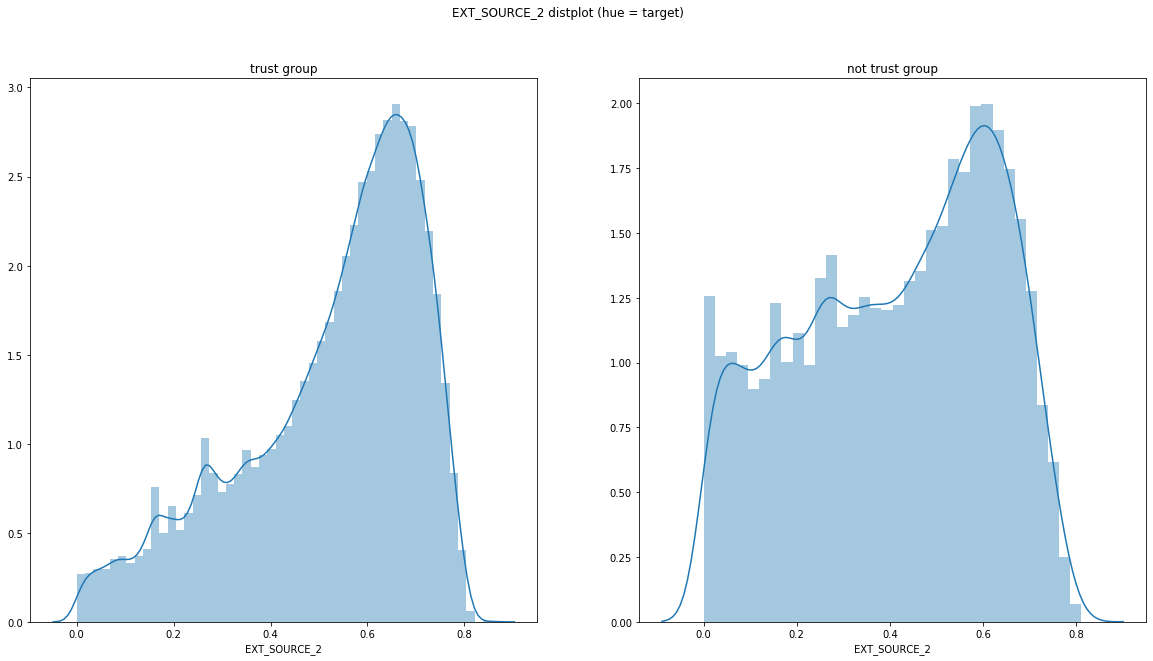

In [191]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20,10))
fig.suptitle('EXT_SOURCE_2 distplot (hue = target) ')

plt.subplot(1,2,1)
nonnull_df_2 = df_ohe_imputed.loc[non_nan_2,['EXT_SOURCE_2','TARGET']]
istrust_2 = nonnull_df_2.loc[:,'TARGET'] == 0
#print(istrust)
df_2_trustgroup = nonnull_df_2.loc[istrust_2,'EXT_SOURCE_2']
df_2_trustgroup
sns.distplot(df_2_trustgroup)
plt.title('trust group')
plt.subplot(1,2,2)
isnottrust_2 = ~np.array(istrust_2)
print(isnottrust_2)
df_2_nottrustgroup = nonnull_df_2.loc[isnottrust_2,'EXT_SOURCE_2']
sns.distplot(df_2_nottrustgroup)
plt.title('not trust group')

[ True False False ... False  True False]


Text(0.5, 1.0, 'not trust group')

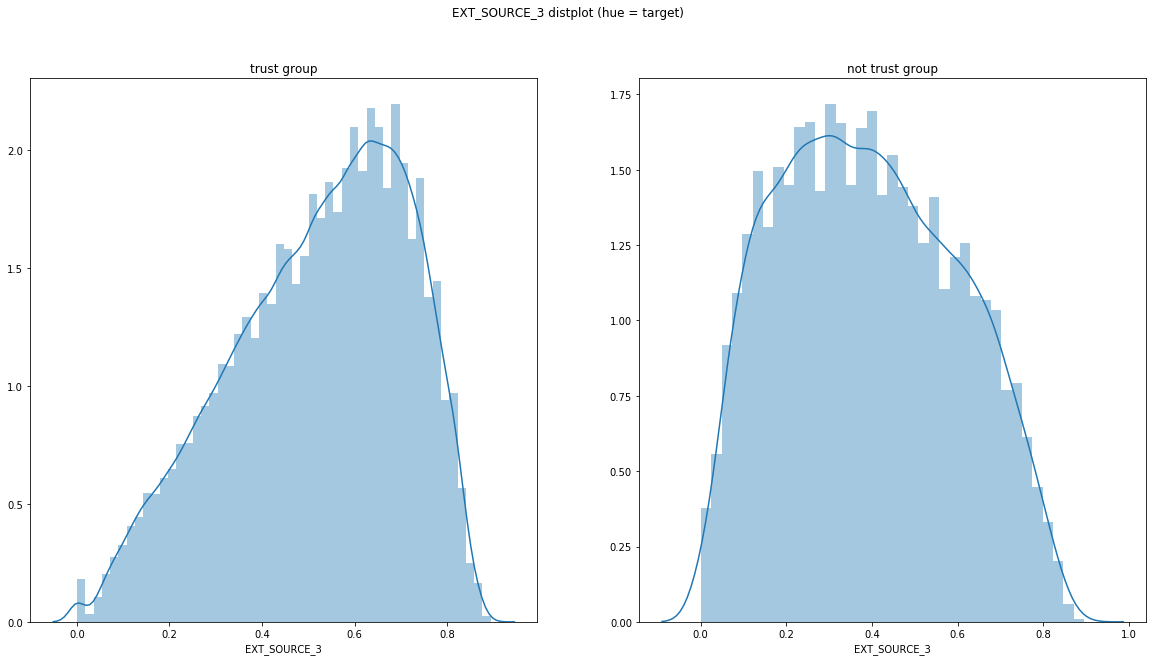

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20,10))
fig.suptitle('EXT_SOURCE_3 distplot (hue = target) ')

plt.subplot(1,2,1)
nonnull_df_3 = df_ohe_imputed.loc[non_nan_3,['EXT_SOURCE_3','TARGET']]
istrust_3 = nonnull_df_3.loc[:,'TARGET'] == 0
#print(istrust)
df_3_trustgroup = nonnull_df_3.loc[istrust_3,'EXT_SOURCE_3']
df_3_trustgroup
sns.distplot(df_3_trustgroup)
plt.title('trust group')
plt.subplot(1,2,2)
isnottrust_3 = ~np.array(istrust_3)
print(isnottrust_3)
df_3_nottrustgroup = nonnull_df_3.loc[isnottrust_3,'EXT_SOURCE_3']
sns.distplot(df_3_nottrustgroup)
plt.title('not trust group')

targetごとに分布を分けるとtargetによって、分布の形が少し異なることがわかる。
例えばEXT_SOURCE_2に置いては、どちらも基本的には0.7あたりを中心として分布しているが、値が0.6より小さくなればなるほど、信用できない可能性が上がると言える。
ちなみに、この分布がregplotによって示した 「値が大きくなればなるほど信用できる」という主張の裏付けとなっていることがわかる。